<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/res-net/Algorithums/pretrained/ResNet50/ResidualNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet 50

## Imports

### Collab Imports

In [1]:
from google.colab import drive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Tensorflow Imports

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D

## Variables

### Path variables

In [4]:
dataset_dir='/content/drive/MyDrive/ayushvision_root' #datasetbase dirctory

In [17]:
dataset_train_dir=os.path.join(dataset_dir,'train')
dataset_val_dir=os.path.join(dataset_dir,'val')
dataset_test_dir=os.path.join(dataset_dir,'test')

### Genrator Variable

In [6]:
rescale=1/255

### Configration Variables

In [49]:
target_size=(224,224)
class_mode='sparse'
input_shape=(224,224,3)

### Model Variables

#### Number If Classes

In [8]:
no_of_classes=32

## Envirumentatl Setup

### Collab

In [9]:
drive.mount('/content/drive') # drive activate for Use

Mounted at /content/drive


## Validations

In [18]:
f'{dataset_train_dir} is Correct' if os.path.exists(dataset_train_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_train_dir} is incorrect'


'/content/drive/MyDrive/ayushvision_root/train is Correct'

In [19]:
f'{dataset_test_dir} is Correct' if os.path.exists(dataset_test_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_test_dir} is incorrect'


'/content/drive/MyDrive/ayushvision_root/test is Correct'

In [20]:
f'{dataset_val_dir} is Correct' if os.path.exists(dataset_val_dir) and os.path.isdir(dataset_val_dir) else f' {dataset_val_dir} is incorrect'

'/content/drive/MyDrive/ayushvision_root/val is Correct'

## DataSet

### Image Genarator

In [21]:
train_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [22]:
test_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [23]:
val_data_genrator=image.ImageDataGenerator(rescale=rescale)

### Prepared Dataset

In [24]:
train_ds_gen=train_data_genrator.flow_from_directory(
    dataset_train_dir,
    target_size=target_size,
    class_mode=class_mode
)


Found 420 images belonging to 1 classes.


In [25]:
val_ds_gen=val_data_genrator.flow_from_directory(
    dataset_val_dir,
    target_size=target_size,
    class_mode=class_mode
)



Found 46 images belonging to 1 classes.


In [50]:
test_ds_gen=test_data_genrator.flow_from_directory(
    dataset_test_dir,
    target_size=target_size,
    class_mode=class_mode
)

Found 14 images belonging to 2 classes.


## Model


### Base Model ResNet50

In [27]:
ayush_resnet50_base=ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Layers setup for Base Model

In [28]:
for layer in ayush_resnet50_base.layers:
    layer.trainable=False

### Final Model

In [29]:
ayushVision_Resnet50_Model=Sequential([Input(shape=input_shape),ayush_resnet50_base])


#### Middle Layers

#### Last Layer

In [30]:
ayushVision_Resnet50_Model.add(Dense(no_of_classes,activation='softmax'))

In [43]:
epochs=10

In [31]:
ayushVision_Resnet50_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1000)                │      25,636,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          32,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,668,744 (97.92 MB)

 Trainable params: 32,032 (125.12 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

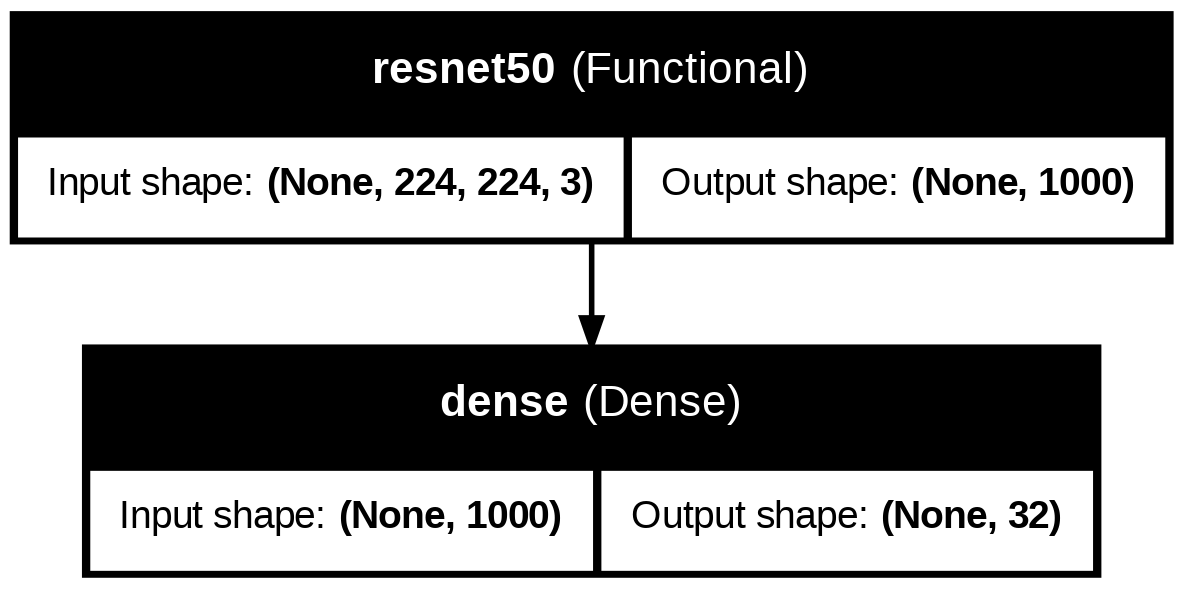

In [32]:
plot_model(ayushVision_Resnet50_Model, to_file= f'/content/drive/My Drive/res50{epochs}.png' , show_shapes=True, show_layer_names=True)

## Model Compile

#### Optimizer

In [33]:
optimizer = Adam(learning_rate=0.001)

#### Compile

##### Variables

In [38]:
metrics=["accuracy"]
lossfn='sparse_categorical_crossentropy'

In [39]:
ayushVision_Resnet50_Model.compile(
    optimizer=optimizer,
    loss=lossfn,
    metrics=metrics)

### Trainning

In [44]:
model_history=ayushVision_Resnet50_Model.fit(
    train_ds_gen,
    epochs=epochs,
    validation_data=val_ds_gen)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 1.0000 - loss: 3.3860 - val_accuracy: 1.0000 - val_loss: 3.3452
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 1.0000 - loss: 3.3322 - val_accuracy: 1.0000 - val_loss: 3.2915
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 1.0000 - loss: 3.2787 - val_accuracy: 1.0000 - val_loss: 3.2379
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 1.0000 - loss: 3.2240 - val_accuracy: 1.0000 - val_loss: 3.1845
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 1.0000 - loss: 3.1718 - val_accuracy: 1.0000 - val_loss: 3.1313
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 1.0000 - loss: 3.1183 - val_accuracy: 1.0000 - val_loss: 3.0782
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 1.0000 - loss: 3.0656 - val_accuracy: 1.0000 - val_loss: 3.0253
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 1.0000 - loss: 3.0127 - val_accuracy: 1.

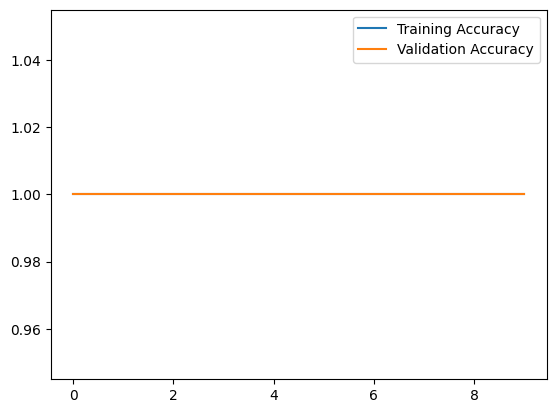

In [46]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f'accuracy{epochs}.png')
plt.show()

### Evaluation